In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize


# WSL not working with jypyter notebook

import ase
from ase import Atoms
from ase.units import eV, Ang, GPa

import Morse

import sys
sys.path.append(r'files')

%matplotlib inline

In [15]:

def interaction_potential(r, r0, alpha):
    dr = r - r0
    return np.exp(- 2 * alpha * dr) - 2 * np.exp( - alpha * dr)

def morse_potential(positions, r0, alpha, D ):
    # loop for each pair of atoms once
    for i in range(len(positions)):
        for j in range(i+1, len(positions)):
            r = np.linalg.norm(positions[i] - positions[j])
            if r < r0:
                return D * interaction_potential(r, r0, alpha)
    

(2, 3)


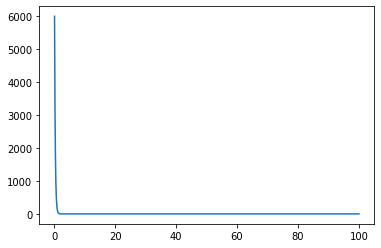

In [27]:

energies = []
distances = Ang*np.linspace(0.5, 5, 100)

for d in distances:

    a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., d)])
    calc = Morse.MorsePotential()
    a.set_calculator(calc)
    e = morse_potential(a.positions, calc.parameters.r0, calc.parameters.alpha, calc.parameters.D)
    energies.append(a.get_potential_energy())

plt.plot(distances, energies)
print(a.get_forces().shape)

In [ ]:

a.get_potential_energy()
r0 = 2.5*Ang
alpha = 1.0
morse_potential(a.positions, r0, alpha)